## Reading in the data

In [1]:
## Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

import math



In [2]:
anp_df = pd.read_pickle(r'anp.pickle') #feather.read_dataframe('data_science_case/anp.feather')
face_df = pd.read_pickle(r'face.pickle') #feather.read_dataframe('data_science_case/face.feather')
image_df = pd.read_pickle(r'image_data.pickle') #feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = pd.read_pickle(r'image_metrics.pickle') #feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = pd.read_pickle(r'object_labels.pickle') #feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = pd.read_pickle(r'survey.pickle') #feather.read_dataframe('data_science_case/survey.feather')
celebrity_df = pd.read_pickle(r'celebrity.pickle') #feather.read_dataframe('data_science_case/survey.feather')


In [3]:
image_df

,image_id,image_link,image_url,image_height,image_width,image_filter,image_posted_time_unix,image_posted_time,data_memorability,user_id,user_full_name,user_name,user_website,user_profile_pic,user_bio,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,https://www.instagram.com/p/BJGysPxgsTy/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Lo-fi,1471214231,14-08-2016 22:37:11,0.800521,3468175004,Leah Jenkins,leah.chelle,,https://scontent.cdninstagram.com/t51.2885-19/...,,7.0,0.0,1.0
1,552382455733335946_263042348,https://www.instagram.com/p/eqdOq2JLeK/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1380069141,25-09-2013 00:32:21,0.875568,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
2,594552614686078174_263042348,https://www.instagram.com/p/hARnP2pLTe/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1385096216,22-11-2013 04:56:56,0.672679,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
3,553884883234370621_263042348,https://www.instagram.com/p/evy13fpLQ9/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1380248245,27-09-2013 02:17:25,0.843525,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
4,725551583154452417_263042348,https://www.instagram.com/p/oRrVIcJLfB/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1400712510,21-05-2014 22:48:30,0.859796,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
5,729007634218530400_263042348,https://www.instagram.com/p/od9JS0JLZg/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Vesper,1401124503,26-05-2014 17:15:03,0.911094,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
6,649477932919862696_263042348,https://www.instagram.com/p/kDaL0pJLWo/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Amaro,1391643824,05-02-2014 23:43:44,0.849862,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
7,528485177494910753_263042348,https://www.instagram.com/p/dVjngJpLch/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Sierra,1377220364,23-08-2013 01:12:44,0.899529,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
8,667774966458266919_263042348,https://www.instagram.com/p/lEactBpLUn/,https://scontent.cdninstagram.com/t51.2885-15/...,640.0,640.0,Normal,1393825001,03-03-2014 05:36:41,0.904644,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0
9,435586528885126653_263042348,https://www.instagram.com/p/YLg6PjJLX9/,https://scontent.cdninstagram.com/t51.2885-15/...,612.0,612.0,Normal,1366145982,16-04-2013 20:59:42,0.930425,263042348,Taylor Degruise,taylordegruise,,https://scontent.cdninstagram.com/t51.2885-19/...,,316.0,347.0,73.0


## Data aggregatie

In [4]:
#####################################
## OBJECTS DATA
#####################################
# df = object_labels_df.groupby("data_amz_label").count().reset_index() ## 2101 possible objects , dit is te veel
# df[df['image_id']>500].reset_index() ## 48 objecten hebben meer dan 500 observaties, laten we 48 kolommen maken
# list_met_columns = df[df['image_id']>500].data_amz_label.tolist() ## een lijst met alle kollommen die we willen
# df = object_labels_df[object_labels_df.data_amz_label.isin(list_met_columns)] ## Filter alle labels die niet vaker voor komen dan 500 keer resulteert in 108k regels


# df = df[['image_id','data_amz_label']] ## selecting only relevant columns (every confidence is >0.7)
# df_object = df.pivot_table(index='image_id', columns='data_amz_label', aggfunc=len, fill_value=0) ## Pivot count (looks like len)
# df_object = df_object.reset_index()
# df_object.head()

In [5]:
f = lambda x: x["image_id"].split("_")[1]  ## Maak functie aan

df = object_labels_df.groupby("data_amz_label").count().reset_index() ## 2101 possible objects , dit is te veel
# df[df['image_id']>500].reset_index() ## 48 objecten hebben meer dan 500 observaties, laten we 48 kolommen maken
list_met_columns = df[df['image_id']>500].data_amz_label.tolist() ## een lijst met alle kollommen die we willen
df = object_labels_df[object_labels_df.data_amz_label.isin(list_met_columns)] ## Filter alle labels die niet vaker voor komen dan 500 keer resulteert in 108k regels

df['user_id']= df.apply(f, axis=1)
df.drop(columns = 'image_id',axis=1,inplace=True)



df = df[['user_id','data_amz_label']] ## selecting only relevant columns (every confidence is >0.7)
df_object = df.pivot_table(index='user_id', columns='data_amz_label', aggfunc=len, fill_value=0) ## Pivot count (looks like len)
df_object = df_object.reset_index()


df_object.set_index('user_id', inplace=True)

df_object = df_object.apply(lambda x: x/x.sum(), axis=1).reset_index()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
face_df.head()

,image_id,face_id,face_gender,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SAD,12.660271
1,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,CALM,8.252973
2,1003944279371027183_703978203,6.0,Female,98.741425,38.0,20.0,False,False,99.998474,False,99.999794,False,99.916168,True,95.395546,SURPRISED,24.634266
3,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,HAPPY,53.603287
4,1003944279371027183_703978203,68.0,Male,99.927521,77.0,57.0,False,False,99.981598,False,99.993256,False,84.395294,True,99.420914,SAD,5.509090


In [7]:
#####################################
## FACE --> EMO
#####################################
df = face_df[['image_id','face_id','face_emo','emo_confidence']] ## selecting the emotion's
emo_face =pd.pivot_table(df, index= ['image_id'],columns ='face_emo',values = 'emo_confidence').fillna(0) ## Gemiddelde emotie per foto
emo_face = emo_face.reset_index()
emo_face.head()


#####################################
## FACE --> PEOPLE en GENDER
#####################################
f = lambda x: x["image_id"].split("_")[1]  ## Maak functie aan

df_people_in_pic = face_df[['image_id','face_id']].drop_duplicates()
df_people_in_pic['user_id']= df_people_in_pic.apply(f, axis=1)
df_people_in_pic.drop(columns = 'image_id',axis=1,inplace=True)
df_people_in_pic = df_people_in_pic.drop_duplicates()

df_aantal_people_in_pic = df_people_in_pic.groupby(['user_id']).count().reset_index()
df_aantal_people_in_pic.columns = ['user_id', 'aantal_personen']
df_aantal_people_in_pic


df = face_df[['image_id','face_id','face_gender']].drop_duplicates()
df['user_id']= df.apply(f, axis=1)
df.drop(columns = 'image_id',axis=1,inplace=True)
df = df.drop_duplicates()



df = df[df['face_gender'] == 'Male']  ## Select only males
df = df.groupby('user_id').count().reset_index()
df.columns = ['user_id', 'aantal_mannen', 'mag_weg']
df_aantal_mannen_in_pic = df[['user_id', 'aantal_mannen']]
people = pd.merge(df_aantal_people_in_pic, df_aantal_mannen_in_pic, how='left', on='user_id').fillna(0)
people['aantal_vrouwen'] = people.aantal_personen - people.aantal_mannen 
people['ratio_mannen']  = people.aantal_mannen / people.aantal_personen 
people['ratio_vrouwen']  = people.aantal_vrouwen / people.aantal_personen 

people.head()



#####################################
## FACE --> PEOPLE en GENDER
#####################################
df = face_df[['image_id','face_id','face_age_range_high','face_age_range_low']].drop_duplicates()
df['gem_leeftijd'] = (df.face_age_range_high + df.face_age_range_low ) / 2 
df = df[['image_id','face_id','gem_leeftijd']]

def roundup(x):
    return str(int((x+5)/10)*10) 

df['nearest_decade_leeftijd'] = df.gem_leeftijd.apply(roundup)
df = df[['image_id','face_id','nearest_decade_leeftijd']]
leeftijd_mensen_in_foto = df.pivot_table(index='image_id', columns='nearest_decade_leeftijd', aggfunc=len, fill_value=0) ## Pivot count (looks like len)
leeftijd_mensen_in_foto = leeftijd_mensen_in_foto.reset_index()
leeftijd_mensen_in_foto.columns = ['_'.join(col) for col in leeftijd_mensen_in_foto.columns]
leeftijd_mensen_in_foto.rename(columns={'image_id_': 'image_id'}, inplace=True)
leeftijd_mensen_in_foto.head() 

,image_id,face_id_0,face_id_10,face_id_20,face_id_30,face_id_40,face_id_50,face_id_60,face_id_70,face_id_80
0,1000126179441391393_30837828,0,2,0,3,3,0,0,0,0
1,1000135251972767429_31447990,0,0,0,1,0,0,0,0,0
2,1000159024449036821_265063047,0,0,0,2,0,0,0,0,0
3,1000185226634350811_276232195,0,0,0,0,1,0,0,0,0
4,1000204070831242247_143854846,0,0,0,1,0,0,0,0,0


In [8]:
people.head()

,user_id,aantal_personen,aantal_mannen,aantal_vrouwen,ratio_mannen,ratio_vrouwen
0,1097967773,100,58.0,42.0,0.580000,0.420000
1,11520833,98,61.0,37.0,0.622449,0.377551
2,1223036636,17,12.0,5.0,0.705882,0.294118
3,1224423305,1,1.0,0.0,1.000000,0.000000
4,1249457735,21,6.0,15.0,0.285714,0.714286


In [9]:
emo_face.head()

face_emo,image_id,ANGRY,CALM,CONFUSED,DISGUSTED,HAPPY,SAD,SURPRISED
0,1000126179441391393_30837828,2.69576,2.688435,1.401609,0.000000,93.731052,4.116577,4.390028
1,1000135251972767429_31447990,0.00000,0.000000,0.000000,0.000000,98.248589,0.289029,20.180923
2,1000159024449036821_265063047,0.00000,0.000000,13.949105,0.000000,5.337354,0.000000,47.158062
3,1000185226634350811_276232195,0.00000,0.000000,4.370034,6.414753,0.000000,0.000000,24.538427
4,1000204070831242247_143854846,0.00000,0.000000,10.848862,0.000000,93.676590,26.206802,0.000000


In [10]:
#####################################
## ANP --> ANP
#####################################
# anp_df.anp_label.value_counts() ## 3864 different lengts, laten we enkel pakken met count groter dan 500
df = anp_df[['image_id','anp_label','anp_sentiment']]
df_count = df.groupby("anp_label").count().reset_index() 
list_met_columns = df_count[df_count['image_id']>500].anp_label.tolist() ## een lijst met alle kollommen die we willen (81)

df = df[df.anp_label.isin(list_met_columns)] ## Filter alle labels die niet vaker voor komen dan 500 keer resulteert in 108k regels
anp = df.pivot_table(index='image_id', columns='anp_label', fill_value=0) ## Pivot mean is default
anp = anp.reset_index()
anp.columns = ['_'.join(col) for col in anp.columns]
anp.rename(columns={'image_id_': 'image_id'}, inplace=True)
anp.head()


#####################################
## ANP --> Sentiment
#####################################
# anp_df.emotion_label.value_counts() ## 24 different lengts
df = anp_df[['image_id','emotion_label','emotion_score']]
emotion_score = df.pivot_table(index='image_id', columns='emotion_label', fill_value=0) ## Pivot mean is default
emotion_score = emotion_score.reset_index()
emotion_score.columns = ['_'.join(col) for col in emotion_score.columns]
emotion_score.rename(columns={'image_id_': 'image_id'}, inplace=True)
emotion_score.head()




,image_id,emotion_score_acceptance,emotion_score_admiration,emotion_score_amazement,emotion_score_anger,emotion_score_annoyance,emotion_score_anticipation,emotion_score_apprehension,emotion_score_boredom,emotion_score_disgust,...,emotion_score_joy,emotion_score_loathing,emotion_score_pensiveness,emotion_score_rage,emotion_score_sadness,emotion_score_serenity,emotion_score_surprise,emotion_score_terror,emotion_score_trust,emotion_score_vigilance
0,1000004599066965477_545497348,0.0,0.0,0.196933,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.11260,0.0,0.0000,0.0,0.0,0.0
1,1000059425592054064_703978203,0.0,0.0,0.346800,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.11555,0.0,0.2026,0.0,0.0,0.0
2,1000065308809420330_46329534,0.0,0.0,0.171525,0.0,0.0987,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0000,0.0,0.0,0.0
3,1000080765059521113_31736205,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.21565,0.0,0.0,0.0,0.12340,0.0,0.0000,0.0,0.0,0.0
4,1000097452173278518_206726006,0.0,0.0,0.198100,0.0,0.0000,0.0,0.0,0.0,0.0,...,0.40130,0.0,0.0,0.0,0.09745,0.0,0.0000,0.0,0.0,0.0


In [11]:
anp.head()

,image_id,anp_sentiment_bad_hair,anp_sentiment_bad_sign,anp_sentiment_baked_goods,anp_sentiment_beautiful_baby,anp_sentiment_big_glasses,anp_sentiment_classic_toy,anp_sentiment_colorful_hair,anp_sentiment_comic_life,anp_sentiment_comic_sans,...,anp_sentiment_sticky_notes,anp_sentiment_straight_hair,anp_sentiment_sweet_baby,anp_sentiment_sweet_tea,anp_sentiment_temporary_tattoos,anp_sentiment_true_story,anp_sentiment_ugly_sweater,anp_sentiment_visual_identity,anp_sentiment_visual_journal,anp_sentiment_wise_words
0,1000065308809420330_46329534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000097452173278518_206726006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000159024449036821_265063047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000185226634350811_276232195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000204070831242247_143854846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#####################################
## IMAGE
#####################################

# image_df.image_id.is_unique ## Image is unique
## DROP COLOMMEN DIE GEEN VOORSPELKRACHT HEBBEN
# image_df.drop(columns = ['image_id','image_link','image_url','user_full_name','user_name', 'user_website','user_profile_pic', 'user_bio'], inplace=True )

##FILTER PLAT SLAAN

# image_df.image_filter.value_counts() ## ongv. 30
df = image_df[['user_id','image_filter']]
# df_count = df.groupby("image_filter").count().reset_index() 
df_filter = df.pivot_table(index='user_id', columns='image_filter', aggfunc= len ,fill_value=0)
df_filter = df_filter.reset_index()
df_filter.columns = [str(col) + '_filter' for col in df_filter.columns]
df_filter.rename(columns={'user_id_filter': 'user_id'}, inplace=True)
## Waar kunnen we gemiddelde van nemen
df_filter.set_index('user_id', inplace=True)
df_filter = df_filter.apply(lambda x: x/x.sum(), axis=1).reset_index()
df_filter.head()
df = image_df[['user_id','image_height','image_width','data_memorability']]

df_mean_vars = df.groupby('user_id').mean().reset_index()


df = image_df[['user_id','user_followed_by','user_follows','user_posted_photos']]
df['aantal_fotos'] = 1 
df_sum_vars = df.groupby('user_id').mean().reset_index() ## Moet ook mean zijn, want haalt niet uit

df_sum_vars.shape  #159
df_mean_vars.shape #159
df_filter.shape #159

temp_df = pd.merge(df_sum_vars, df_mean_vars, how='inner', on='user_id')
image_df_user = pd.merge(temp_df, df_filter, how='inner', on='user_id')
image_df_user.head()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,user_followed_by,user_follows,user_posted_photos,aantal_fotos,image_height,image_width,data_memorability,1977_filter,Aden_filter,...,Slumber_filter,Stinson_filter,Sutro_filter,Toaster_filter,Unknown_filter,Valencia_filter,Vesper_filter,Walden_filter,Willow_filter,X-Pro II_filter
0,1097967773,53.0,154.0,282.0,1,636.730496,632.056738,0.843239,0.00000,0.063830,...,0.01773,0.021277,0.000000,0.000000,0.003546,0.067376,0.0,0.000000,0.0,0.017730
1,11520833,201.0,299.0,312.0,1,617.157051,617.166667,0.819178,0.00641,0.000000,...,0.00000,0.000000,0.028846,0.009615,0.003205,0.032051,0.0,0.009615,0.0,0.028846
2,1223036636,169.0,159.0,48.0,1,640.000000,640.000000,0.869481,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,1224423305,1.0,18.0,41.0,1,432.365854,593.170732,0.790601,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.024390,0.0,0.000000,0.0,0.000000
4,1249457735,66.0,93.0,30.0,1,645.333333,640.000000,0.804556,0.00000,0.033333,...,0.00000,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.2,0.066667


In [13]:
#####################################
## Metrix
#####################################
metrics_df['user_id']=metrics_df.apply(f, axis=1)
metrics_df = metrics_df.groupby('image_id').max() ## op een of andere manier werkt drop_duplicates niet vaagg...
metrics_df = metrics_df.reset_index()
df = metrics_df[['user_id','comment_count','like_count']]
metrics_df_user = df.groupby('user_id').mean().reset_index()
metrics_df_user.head()

,user_id,comment_count,like_count
0,1097967773,0.731183,5.892473
1,11520833,0.356557,5.540984
2,1223036636,1.978723,11.340426
3,1224423305,0.000000,0.052632
4,1249457735,0.241379,5.689655


In [14]:
#####################################
## IMAGE
#####################################
# survey_df.info()

survey_df.id.is_unique ## Image is unique

True

In [15]:
#####################################
## CELEB
#####################################
# celebrity_df.image_id.is_unique
# celebrity_df.head(20)
# celebrity_df.face_celebrity_name.value_counts() #2177 counts
# GRootste is 20 en gaat heel snel naar 4/5 hier zit geen voorspelende waarde in!

In [16]:
#####################################
## Analyse op aantallen
#####################################

emo_face.shape#(15957, 7)   NIet elke foto heeft mensen erin
df_object.shape#(31051, 48) Niet elke foto heeft een getraind object, gelukkig wel veel gevonden
emotion_score.shape#(41292, 24) Voor paar fotos niet gevuld
leeftijd_mensen_in_foto.shape#(15957, 9)   NIet elke foto heeft mensen erin
# people.shape#(15957, 6)   NIet elke foto heeft mensen erin
metrics_df.shape#(35803, 4) ##RAAR dat dit niet voor elke gevuld is.... Denk dat de data die we hebben gekregen beetje corrupt is, zaten ook duplicates tussen
image_df.shape#(41206, 18) ## dit zijn alle fotos
anp.shape#(22377, 82) ## We hebben hierin gesneden dus dit kan kloppen

(22377, 82)

In [17]:
#####################################
## User id uit elke extracten
#####################################
f = lambda x: x["image_id"].split("_")[1]  ## Maak functie aan

emo_face['user_id'] = emo_face.apply(f, axis=1)
# df_object['user_id'] =df_object.apply(f, axis=1) IS NU AL PLAT GESLAGEN
emotion_score['user_id']= emotion_score.apply(f, axis=1)
leeftijd_mensen_in_foto['user_id']= leeftijd_mensen_in_foto.apply(f, axis=1)
anp['user_id']=anp.apply(f, axis=1)


In [18]:
#####################################
## Aggegreren op user_id
#####################################
emo_user_face =emo_face.loc[:, emo_face.columns != 'image_id'].groupby('user_id').mean().reset_index()
object_user = df_object
# object_user = df_object.loc[:, df_object.columns != 'image_id'].groupby('user_id').sum().reset_index() ## BOVEN AL PLAT GESLAGEN
emo_user =emotion_score.loc[:, emotion_score.columns != 'image_id'].groupby('user_id').mean().reset_index()
leeftijd_mensen_in_foto_user = leeftijd_mensen_in_foto.loc[:, leeftijd_mensen_in_foto.columns != 'image_id'].groupby('user_id').sum().reset_index()
anp_user =anp.loc[:, anp.columns != 'image_id'].groupby('user_id').mean().reset_index()
# people ## deze is al op niveau van user
# image_df_user ## deze is ook al op niveau

In [19]:
part1 = emo_user_face.iloc[:,1:]/100  
part2 = emo_user_face.iloc[:,:1]


In [20]:
emo_user_face = pd.merge(part2, part1, left_index=True, right_index=True)

In [21]:
emo_user['user_id'] = emo_user['user_id'].astype('int64')
object_user['user_id'] = object_user['user_id'].astype('int64')
leeftijd_mensen_in_foto_user['user_id'] = leeftijd_mensen_in_foto_user['user_id'].astype('int64')
anp_user['user_id'] = anp_user['user_id'].astype('int64')
people['user_id'] = people['user_id'].astype('int64')
image_df_user['user_id'] = image_df_user['user_id'].astype('int64')
metrics_df_user['user_id'] = metrics_df_user['user_id'].astype('int64')
emo_user_face['user_id'] = emo_user_face['user_id'].astype('int64')

temp = pd.merge(survey_df, emo_user, how='left', left_on='insta_user_id', right_on='user_id')
temp2 = pd.merge(temp, object_user, how='left', left_on='insta_user_id', right_on='user_id')
temp3 = pd.merge(temp2, leeftijd_mensen_in_foto_user, how='left', left_on='insta_user_id', right_on='user_id')
temp4 = pd.merge(temp3, anp_user, how='left', left_on='insta_user_id', right_on='user_id')
temp5 = pd.merge(temp4, people, how='left', left_on='insta_user_id', right_on='user_id')
temp6 = pd.merge(temp5, image_df_user, how='left', left_on='insta_user_id', right_on='user_id')
temp7 = pd.merge(temp6, metrics_df_user, how='left', left_on='insta_user_id', right_on='user_id')
platte_df = pd.merge(temp7, emo_user_face, how='left', left_on='insta_user_id', right_on='user_id')

platte_df.shape



(161, 282)

In [22]:
## Alle kolommmen bekijken
from IPython.display import display
pd.options.display.max_columns = None
display(platte_df.head())

,index,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,M_2,E_2,LON,H_2,P_2,N_2,A_3,N_3,E_3,H_3,R_2,M_3,R_3,P_3,HAP,participate,insta_user_id,completed,start_q,end_q,network_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,private_account,user_id_x,emotion_score_acceptance,emotion_score_admiration,emotion_score_amazement,emotion_score_anger,emotion_score_annoyance,emotion_score_anticipation,emotion_score_apprehension,emotion_score_boredom,emotion_score_disgust,emotion_score_distraction,emotion_score_ecstasy,emotion_score_fear,emotion_score_grief,emotion_score_interest,emotion_score_joy,emotion_score_loathing,emotion_score_pensiveness,emotion_score_rage,emotion_score_sadness,emotion_score_serenity,emotion_score_surprise,emotion_score_terror,emotion_score_trust,emotion_score_vigilance,user_id_y,Alcohol,Animal,Art,Beverage,Blossom,Bottle,Bowl,Brochure,Cake,Canine,Car,Cat,Clothing,Collage,Couch,Crowd,Cup,Dessert,Dog,Drink,Electronics,Face,Female,Flora,Flower,Flyer,Food,Furniture,Glass,Goggles,Human,Mammal,Musical Instrument,Outdoors,Paper,People,Person,Pet,Plant,Portrait,Poster,Potted Plant,Selfie,Smile,Text,Tree,Vehicle,Water,user_id_x,face_id_0,face_id_10,face_id_20,face_id_30,face_id_40,face_id_50,face_id_60,face_id_70,face_id_80,user_id_y,anp_sentiment_bad_hair,anp_sentiment_bad_sign,anp_sentiment_baked_goods,anp_sentiment_beautiful_baby,anp_sentiment_big_glasses,anp_sentiment_classic_toy,anp_sentiment_colorful_hair,anp_sentiment_comic_life,anp_sentiment_comic_sans,anp_sentiment_compact_disc,anp_sentiment_crazy_face,anp_sentiment_cute_baby,anp_sentiment_cute_cat,anp_sentiment_cute_couple,anp_sentiment_cute_dog,anp_sentiment_cute_guy,anp_sentiment_cute_kitty,anp_sentiment_dark_chocolate,anp_sentiment_double_exposition,anp_sentiment_double_portrait,anp_sentiment_dyed_hair,anp_sentiment_dynamic_light,anp_sentiment_early_days,anp_sentiment_fake_lomo,anp_sentiment_fake_vintage,anp_sentiment_fitting_room,anp_sentiment_frozen_food,anp_sentiment_funny_cats,anp_sentiment_funny_dog,anp_sentiment_funny_quotes,anp_sentiment_funny_signs,anp_sentiment_funny_stuff,anp_sentiment_good_day,anp_sentiment_good_food,anp_sentiment_grand_baby,anp_sentiment_grilled_chicken,anp_sentiment_grumpy_cat,anp_sentiment_hairless_cat,anp_sentiment_happy_baby,anp_sentiment_happy_birthday,anp_sentiment_happy_couple,anp_sentiment_healthy_food,anp_sentiment_hot_drink,anp_sentiment_hot_guys,anp_sentiment_hot_men,anp_sentiment_hot_sauce,anp_sentiment_hot_site,anp_sentiment_impossible_project,anp_sentiment_inspirational_quotes,anp_sentiment_inspiring_quotes,anp_sentiment_late_dinner,anp_sentiment_mad_magazine,anp_sentiment_mixed_breed,anp_sentiment_natural_hair,anp_sentiment_old_friends,anp_sentiment_plastic_bullet,anp_sentiment_plastic_surgery,anp_sentiment_raw_food,anp_sentiment_raw_milk,anp_sentiment_real_food,anp_sentiment_real_talk,anp_sentiment_rounded_corners,anp_sentiment_sexy_boy,anp_sentiment_sexy_man,anp_sentiment_short_sale,anp_sentiment_short_stories,anp_sentiment_silly_faces,anp_sentiment_sleepy_dog,anp_sentiment_small_dog,anp_sentiment_smiling_baby,anp_sentiment_sour_cream,anp_sentiment_sticky_notes,anp_sentiment_straight_hair,anp_sentiment_sweet_baby,anp_sentiment_sweet_tea,anp_sentiment_temporary_tattoos,anp_sentiment_true_story,anp_sentiment_ugly_sweater,anp_sentiment_visual_identity,anp_sentiment_visual_journal,anp_sentiment_wise_words,user_id_x,aantal_personen,aantal_mannen,aantal_vrouwen,ratio_mannen,ratio_vrouwen,user_id_y,user_followed_by,user_follows,user_posted_photos,aantal_fotos,image_height,image_width,data_memorability,1977_filter,Aden_filter,Amaro_filter,Apollo_filter,Ashby_filter,Brannan_filter,Brooklyn_filter,Charmes_filter,Clarendon_filter,Crema_filter,Dogpatch_filter,Earlybird_filter,Gingham_filter,Ginza_filter,Gotham_filter,Hefe_filter,Helena_filter,Hudson_filter,Inkwell_filter,Juno_filter,Kelvin_filter,Lark_filter,Lo-fi_filter,Ludwig_filter,Maven_filter,Mayfair_filter,Moon_filter,Nashville_filter,Normal_filter,Perp

In [23]:
platte_df.shape

(161, 282)

## Einde data aggregatie

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
print(scaler)
platte_df = platte_df.dropna()

MinMaxScaler(copy=True, feature_range=(0, 1))


In [25]:
listoflabels = ['comment_count','user_follows','user_followed_by','user_posted_photos','image_height','image_width', 'data_memorability','face_id_0','face_id_10','face_id_20','face_id_30','face_id_40','face_id_50','face_id_60','face_id_70','face_id_80', 'aantal_fotos']

In [26]:
platte_df[['comment_count','user_follows','user_followed_by','user_posted_photos','image_height','image_width', 'data_memorability','face_id_0','face_id_10','face_id_20','face_id_30','face_id_40','face_id_50','face_id_60','face_id_70','face_id_80', 'aantal_fotos']]=scaler.fit_transform(platte_df[['comment_count','user_follows','user_followed_by','user_posted_photos','image_height','image_width', 'data_memorability','face_id_0','face_id_10','face_id_20','face_id_30','face_id_40','face_id_50','face_id_60','face_id_70','face_id_80', 'aantal_fotos']])

In [27]:

#platte_df = platte_df.drop(labels=listoflabels, axis=1)

In [28]:

platte_df = platte_df.drop(labels='user_id_y', axis=1)
platte_df = platte_df.ix[:,~platte_df.columns.duplicated()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df = platte_df.drop(['index', 'id','gender','born','education','employed','income','A_2','N_1','P_1','E_1','A_1','H_1','M_1','R_1','M_2','E_2','LON','H_2','P_2','N_2','A_3','N_3','E_3','H_3','R_2','M_3','R_3','P_3','HAP','participate','insta_user_id','completed','start_q','end_q','network_id','N_EMO','P_EMO','imagecount','private_account','user_id_x'], axis=1, )
df.fillna(value=0, inplace=True)

df.P = df.P.apply(lambda x: int(round(x,0)) if int(round(x,0))%2==0 else int(round(x,0)) + 1) 
df.E = df.E.apply(lambda x: int(round(x,0)) if int(round(x,0))%2==0 else int(round(x,0)) + 1) 
df.R = df.R.apply(lambda x: int(round(x,0)) if int(round(x,0))%2==0 else int(round(x,0)) + 1) 
df.M = df.M.apply(lambda x: int(round(x,0)) if int(round(x,0))%2==0 else int(round(x,0)) + 1) 
df.A = df.A.apply(lambda x: int(round(x,0)) if int(round(x,0))%2==0 else int(round(x,0)) + 1) 
df.PERMA = df.PERMA.apply(lambda x: int(round(x,0)) if int(round(x,0))%2==0 else int(round(x,0)) + 1)

## K-Fold

In [30]:
from sklearn.model_selection import KFold


# create a k fold with 5 splits, with a fixed random state
kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
result = next(kf.split(platte_df), None)

# create train and test pandas dataframe, with the selected distributions
train = df.iloc[result[0]]
test =  df.iloc[result[1]]

print (result[0])
print (result[1])

[  0   1   2   3   4   6   7   8   9  10  11  12  13  15  16  18  20  21
  22  23  24  25  26  27  28  30  32  34  37  38  40  41  43  44  46  47
  48  49  50  51  52  53  55  57  60  61  63  64  66  67  68  69  70  71
  72  74  75  76  79  80  81  82  84  85  86  87  88  89  90  91  93  94
  95  96  97  98  99 100 101 102 104 105 107 108 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 131 132 133 135
 136 137 138 139]
[  5  14  17  19  29  31  33  35  36  39  42  45  54  56  58  59  62  65
  73  77  78  83  92 103 106 109 130 134]


In [31]:
#train.iloc[:,35:38] 

In [32]:
#train.iloc[22:27,47:100] 

In [33]:
#train.iloc[22:27,47:100] 

## Feature_selection

In [34]:
# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

import matplotlib.pyplot as plt

In [35]:
def feature_select(Fit_variables, target_variable , n_variables):
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes
    rfe = RFE(model, n_variables)
    rfe = rfe.fit(Fit_variables , target_variable.astype('str'))
    return rfe
        
def find_column_names_for_ranking(dataset, rfe):
    # calculate index of ranking
    rankingIndex = []
    for x in range(len(rfe.ranking_)):
        if rfe.ranking_[x] == 1:
            rankingIndex.append(x)
            
    # find columns        
    return dataset.iloc[: ,rankingIndex].columns

# select features from the variables with as target the P of the PERMA score, and select top 15 variables
rfe = feature_select(train.iloc[:,6:] , train["P"], 15)
# uncomment to see select binary output
#print(rfe.support_)
#print(rfe.ranking_)

# find the corresponding columns of the ranking
ranking = find_column_names_for_ranking(train.iloc[:,6:], rfe)   
print (ranking)

Index(['face_id_50', 'face_id_80', 'anp_sentiment_happy_baby',
       'anp_sentiment_old_friends', 'anp_sentiment_sexy_boy',
       'anp_sentiment_smiling_baby', 'ratio_mannen', 'user_followed_by',
       'user_follows', 'image_height', 'image_width', 'data_memorability',
       'Normal_filter', 'comment_count', 'SURPRISED'],
      dtype='object')


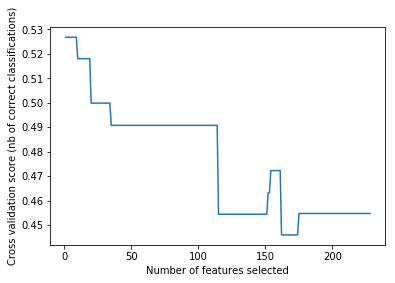

Optimal number of features : 9


In [36]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')

rfecv.fit(train.iloc[:,6:] , train["P"].astype('str'))


# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

print("Optimal number of features : %d" % rfecv.n_features_)

In [37]:
len(train['P'])


112

In [38]:
for train_index, test_index in kf.split(platte_df):
    print("TRAIN:", train_index, "TEST:", test_index)
    # create train and test pandas dataframe, with the selected distributions
    train = df.iloc[train_index]
    test =  df.iloc[test_index]

TRAIN: [  0   1   2   3   4   6   7   8   9  10  11  12  13  15  16  18  20  21
  22  23  24  25  26  27  28  30  32  34  37  38  40  41  43  44  46  47
  48  49  50  51  52  53  55  57  60  61  63  64  66  67  68  69  70  71
  72  74  75  76  79  80  81  82  84  85  86  87  88  89  90  91  93  94
  95  96  97  98  99 100 101 102 104 105 107 108 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 131 132 133 135
 136 137 138 139] TEST: [  5  14  17  19  29  31  33  35  36  39  42  45  54  56  58  59  62  65
  73  77  78  83  92 103 106 109 130 134]
TRAIN: [  0   1   3   5   7   8   9  10  13  14  15  17  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  41  42  43
  45  46  47  49  50  51  52  54  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  75  76  77  78  79  80  81  82  83  85
  86  87  88  90  91  92  93  94  96 100 101 103 105 106 107 108 109 112
 113 116 117 119 120 121 122 123 124 125 127

## Accuracy

In [39]:
def accuracy(ranking_variables, target):

    clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial').fit(ranking_variables, target)
   
    clf.predict(ranking_variables)
    clf.predict_proba(ranking_variables) 
    score = clf.score(ranking_variables, target)
    #print(score)
    return score
    
accuracy(train[ranking], train['P'].astype('str'))

0.5178571428571429

In [40]:
# calculate accuracy from 1 to all variables selected
def calc_accuracy_variables(target):
    scores = []
    for n_variables in range(1,len(train.iloc[:,6:])+1): 
        if n_variables % 10 == 0:
            print(n_variables)
        rfe = feature_select(train.iloc[:,6:] , target, n_variables)
        ranking = find_column_names_for_ranking(train.iloc[:,6:], rfe)   
    
        score = accuracy(train[ranking], train['P'].astype('str'))
        scores.append(score)
        #if n_variables <= 20:
        #    print(ranking)
        #print (n_variables," variables, score: ",  score)
    return scores

#calc_accuracy_variables(train['P'])       

In [41]:
t2 = train.iloc[:,6:]

In [45]:
# BEREKENT VOOR ELKE FOLD, VOOR ELK AANTAL VARIABELEN, VOOR ELKE LETTER DE ACCURACY EN ONTHOUDT DE HOOGSTE PER LETTER PER FOLD
fold = 0
totaldict = {}
for train_index, test_index in kf.split(df):
    if fold < 1:
        #print("TRAIN:", train_index, "TEST:", test_index)
        # create train and test pandas dataframe, with the selected distributions
        train = df.iloc[train_index]
        test =  df.iloc[test_index]
        fold += 1
        print('######### FOLD', fold)
        high = 0.0000001
        highvar = 0
        highestdict = {}
        for letter in 'PERMA':
            scores = calc_accuracy_variables(train[letter])
            print ("PERMA letter: ", letter)
            for x in range(len(scores)):
                if scores[x] > high:
                    high = scores[x]
                    highvar = x+1
                if x % 10 == 0:
                    print ("accuracy ", x+1, " : ", scores[x])
            highestdict[letter] = (high, highvar)
            high = 0.0000001
            highvar = 0
        totaldict[fold] = highestdict
        print(totaldict)


######### FOLD 1
10
20
30
40
50
60
70
80
90
100
110
PERMA letter:  P
accuracy  1  :  0.5267857142857143
accuracy  11  :  0.5267857142857143
accuracy  21  :  0.5267857142857143
accuracy  31  :  0.5267857142857143
accuracy  41  :  0.5267857142857143
accuracy  51  :  0.5267857142857143
accuracy  61  :  0.5446428571428571
accuracy  71  :  0.5178571428571429
accuracy  81  :  0.5178571428571429
accuracy  91  :  0.5267857142857143
accuracy  101  :  0.5267857142857143
accuracy  111  :  0.5357142857142857
10
20
30
40
50
60
70
80
90
100
110
PERMA letter:  E
accuracy  1  :  0.5267857142857143
accuracy  11  :  0.5267857142857143
accuracy  21  :  0.5446428571428571
accuracy  31  :  0.5446428571428571
accuracy  41  :  0.5446428571428571
accuracy  51  :  0.5446428571428571
accuracy  61  :  0.5446428571428571
accuracy  71  :  0.5267857142857143
accuracy  81  :  0.5357142857142857
accuracy  91  :  0.5178571428571429
accuracy  101  :  0.5357142857142857
accuracy  111  :  0.5089285714285714
10
20
30
40
5

In [46]:
backup = totaldict
backup

{1: {'P': (0.5446428571428571, 53),
  'E': (0.5535714285714286, 27),
  'R': (0.5446428571428571, 93),
  'M': (0.5446428571428571, 45),
  'A': (0.5446428571428571, 42)}}

In [42]:
# AANGEPAST ZODAT HIJ DE TEST ACCURACY UITREKENT IPV DE TRAIN
def calc_accuracy_variables2(target, n_variables):
    rfe = feature_select(train.iloc[:,6:] , target, n_variables)
    ranking = find_column_names_for_ranking(train.iloc[:,6:], rfe)  
    #print(test[ranking])
    score = accuracy(test[ranking], test['P'].astype('str'))
    return score

In [90]:

df = df.drop(labels="image_height", axis=1)
df = df.drop(labels="image_width", axis=1)

# OPTIMAL FEATURES RETURNED

In [43]:
def accuracy_train_test(train_x, train_y, ranking_variables, target):

    clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial').fit(train_x, train_y)
   
    clf.predict(ranking_variables)
    clf.predict_proba(ranking_variables) 
    score = clf.score(ranking_variables, target)
    #print(score)
    return score


rankings = {}
accuracies_train = {}
accuracies_test = {}



optimal features of:  PERMA


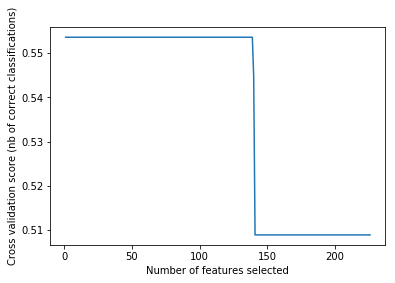

Optimal number of features : 139
top features:  Index(['emotion_score_amazement', 'emotion_score_anger',
       'emotion_score_ecstasy', 'emotion_score_fear', 'emotion_score_interest',
       'emotion_score_joy', 'emotion_score_rage', 'emotion_score_sadness',
       'emotion_score_trust', 'Alcohol',
       ...
       'Willow_filter', 'X-Pro II_filter', 'comment_count', 'ANGRY', 'CALM',
       'CONFUSED', 'DISGUSTED', 'HAPPY', 'SAD', 'SURPRISED'],
      dtype='object', length=139)
accuracy training:  0.6071428571428571
accuracy test:  0.6785714285714286


In [118]:

for letter in "P":
    letter = "PERMA"
    print("\n")
    print("optimal features of: ", letter)
    # Create the RFE object and compute a cross-validated score.
    svc = SVC(kernel="linear")
    # The "accuracy" scoring is proportional to the number of correct
    # classifications
    rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
                  scoring='accuracy')

    highscore = 0
    for train_index, test_index in kf.split(df):
        train = df.iloc[train_index]
        test =  df.iloc[test_index]
        
        rfecv.fit(train.iloc[:,6:] , train[letter].astype('str'))

        rfe = feature_select(train.iloc[:,6:] , train[letter], rfecv.n_features_)
        ranking = find_column_names_for_ranking(train.iloc[:,6:], rfe)   

        accuracy_training = accuracy_train_test(train[ranking], train[letter].astype('str'), train[ranking], train[letter].astype('str'))
        accuracy_test = accuracy_train_test(train[ranking], train[letter].astype('str'), test[ranking], test[letter].astype('str'))
        
        if accuracy_test > highscore:
            highscore = accuracy_test
            best_train = train
            best_test = test
                
    
    rfecv.fit(best_train.iloc[:,6:] , best_train[letter].astype('str'))

    rfe = feature_select(best_train.iloc[:,6:] , best_train[letter], rfecv.n_features_)
    ranking = find_column_names_for_ranking(best_train.iloc[:,6:], rfe) 

    accuracy_training = accuracy_train_test(best_train[ranking], best_train[letter].astype('str'), best_train[ranking], best_train[letter].astype('str'))
    accuracy_test = accuracy_train_test(best_train[ranking], best_train[letter].astype('str'), best_test[ranking], best_test[letter].astype('str'))

    rankings[letter] = ranking
    accuracies_train[letter] = accuracy_training
    accuracies_test[letter] = accuracy_test
    
    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()

    print("Optimal number of features : %d" % rfecv.n_features_)

    # create list of top features with #number of optimal
    print ("top features: ", ranking)
    print("accuracy training: ", accuracy_training)
    print("accuracy test: ", accuracy_test)
    

In [92]:
rankings

{'P': Index(['ratio_mannen', 'HAPPY'], dtype='object'),
 'E': Index(['face_id_30', 'face_id_80', 'ratio_mannen', 'ratio_vrouwen',
        'user_posted_photos', 'data_memorability', 'Amaro_filter',
        'comment_count', 'HAPPY'],
       dtype='object'),
 'R': Index(['ratio_mannen', 'data_memorability'], dtype='object'),
 'M': Index(['emotion_score_amazement', 'emotion_score_joy', 'Animal', 'Food',
        'Human', 'People', 'Person', 'Plant', 'Text', 'face_id_0', 'face_id_10',
        'face_id_20', 'face_id_30', 'face_id_40', 'face_id_50', 'face_id_60',
        'face_id_70', 'face_id_80', 'anp_sentiment_bad_sign',
        'anp_sentiment_beautiful_baby', 'anp_sentiment_cute_dog',
        'anp_sentiment_fake_vintage', 'anp_sentiment_grand_baby',
        'anp_sentiment_happy_baby', 'anp_sentiment_inspirational_quotes',
        'anp_sentiment_old_friends', 'anp_sentiment_sexy_man',
        'anp_sentiment_smiling_baby', 'ratio_mannen', 'ratio_vrouwen',
        'user_follows', 'user_posted

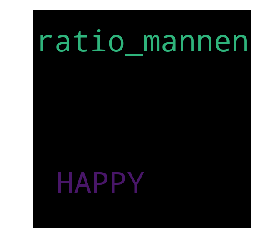

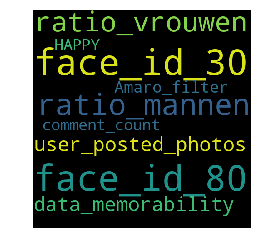

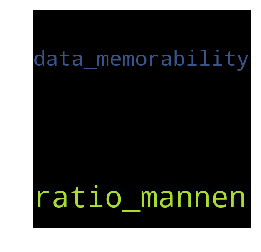

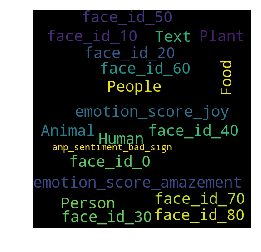

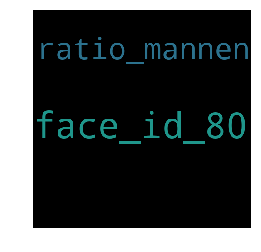

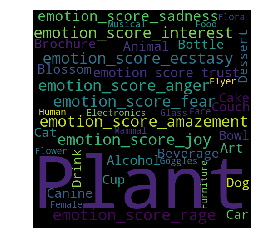

In [120]:
from wordcloud import WordCloud
 
# Create a list of word
for v in rankings.values():
    
    text = ' '.join(str(e) for e in v)
    #''.join(str(e) for e in v)

    # Create the wordcloud object
    wordcloud = WordCloud(width=480, height=480, margin=0, background_color="black", min_font_size=20, max_font_size=200).generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='none')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()


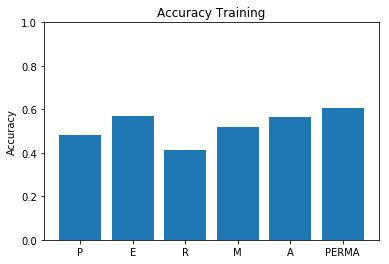

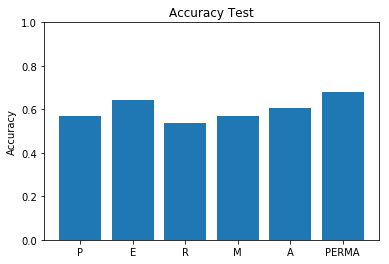

In [121]:
plt.title("Accuracy Training")
plt.ylabel("Accuracy")
plt.bar(range(len(accuracies_train)), list(accuracies_train.values()), align='center')
plt.xticks(range(len(accuracies_train)), list(accuracies_train.keys()))
plt.ylim(0, 1)
plt.show()


plt.title("Accuracy Test")
plt.ylabel("Accuracy")
plt.bar(range(len(accuracies_test)), list(accuracies_test.values()), align='center')
plt.xticks(range(len(accuracies_test)), list(accuracies_test.keys()))
plt.ylim(0, 1)

plt.show()

In [126]:
print (accuracies_train["PERMA"]) 
print (accuracies_test["PERMA"])

0.6071428571428571
0.6785714285714286


In [49]:
## CALCULATES THE TEST ACCURACY
fold = 0
for train_index, test_index in kf.split(df):
    train = df.iloc[train_index]
    test =  df.iloc[test_index]
    print(len(test))
    fold += 1
    print('######### FOLD', fold)
    for letter in 'PERMA':
        print(totaldict[fold][letter][1])
        score = calc_accuracy_variables2(train[letter], totaldict[fold][letter][1])
        print ("PERMA letter: ", letter)
        print ("Accuracy train:", totaldict[fold][letter][0])
        print ("Accuracy test:", score)


28
######### FOLD 1
53
PERMA letter:  P
Accuracy train: 0.5446428571428571
Accuracy test: 0.6071428571428571
27
PERMA letter:  E
Accuracy train: 0.5535714285714286
Accuracy test: 0.5714285714285714
93
PERMA letter:  R
Accuracy train: 0.5446428571428571
Accuracy test: 0.6071428571428571
45
PERMA letter:  M
Accuracy train: 0.5446428571428571
Accuracy test: 0.6071428571428571
42
PERMA letter:  A
Accuracy train: 0.5446428571428571
Accuracy test: 0.6071428571428571
28
######### FOLD 2


KeyError: 2

In [50]:
train.ix[:,~train.columns.duplicated()]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,P,E,R,M,A,PERMA,emotion_score_acceptance,emotion_score_admiration,emotion_score_amazement,emotion_score_anger,emotion_score_annoyance,emotion_score_anticipation,emotion_score_apprehension,emotion_score_boredom,emotion_score_disgust,emotion_score_distraction,emotion_score_ecstasy,emotion_score_fear,emotion_score_grief,emotion_score_interest,emotion_score_joy,emotion_score_loathing,emotion_score_pensiveness,emotion_score_rage,emotion_score_sadness,emotion_score_serenity,emotion_score_surprise,emotion_score_terror,emotion_score_trust,emotion_score_vigilance,Alcohol,Animal,Art,Beverage,Blossom,Bottle,Bowl,Brochure,Cake,Canine,Car,Cat,Clothing,Collage,Couch,Crowd,Cup,Dessert,Dog,Drink,Electronics,Face,Female,Flora,Flower,Flyer,Food,Furniture,Glass,Goggles,Human,Mammal,Musical Instrument,Outdoors,Paper,People,Person,Pet,Plant,Portrait,Poster,Potted Plant,Selfie,Smile,Text,Tree,Vehicle,Water,face_id_0,face_id_10,face_id_20,face_id_30,face_id_40,face_id_50,face_id_60,face_id_70,face_id_80,anp_sentiment_bad_hair,anp_sentiment_bad_sign,anp_sentiment_baked_goods,anp_sentiment_beautiful_baby,anp_sentiment_big_glasses,anp_sentiment_classic_toy,anp_sentiment_colorful_hair,anp_sentiment_comic_life,anp_sentiment_comic_sans,anp_sentiment_compact_disc,anp_sentiment_crazy_face,anp_sentiment_cute_baby,anp_sentiment_cute_cat,anp_sentiment_cute_couple,anp_sentiment_cute_dog,anp_sentiment_cute_guy,anp_sentiment_cute_kitty,anp_sentiment_dark_chocolate,anp_sentiment_double_exposition,anp_sentiment_double_portrait,anp_sentiment_dyed_hair,anp_sentiment_dynamic_light,anp_sentiment_early_days,anp_sentiment_fake_lomo,anp_sentiment_fake_vintage,anp_sentiment_fitting_room,anp_sentiment_frozen_food,anp_sentiment_funny_cats,anp_sentiment_funny_dog,anp_sentiment_funny_quotes,anp_sentiment_funny_signs,anp_sentiment_funny_stuff,anp_sentiment_good_day,anp_sentiment_good_food,anp_sentiment_grand_baby,anp_sentiment_grilled_chicken,anp_sentiment_grumpy_cat,anp_sentiment_hairless_cat,anp_sentiment_happy_baby,anp_sentiment_happy_birthday,anp_sentiment_happy_couple,anp_sentiment_healthy_food,anp_sentiment_hot_drink,anp_sentiment_hot_guys,anp_sentiment_hot_men,anp_sentiment_hot_sauce,anp_sentiment_hot_site,anp_sentiment_impossible_project,anp_sentiment_inspirational_quotes,anp_sentiment_inspiring_quotes,anp_sentiment_late_dinner,anp_sentiment_mad_magazine,anp_sentiment_mixed_breed,anp_sentiment_natural_hair,anp_sentiment_old_friends,anp_sentiment_plastic_bullet,anp_sentiment_plastic_surgery,anp_sentiment_raw_food,anp_sentiment_raw_milk,anp_sentiment_real_food,anp_sentiment_real_talk,anp_sentiment_rounded_corners,anp_sentiment_sexy_boy,anp_sentiment_sexy_man,anp_sentiment_short_sale,anp_sentiment_short_stories,anp_sentiment_silly_faces,anp_sentiment_sleepy_dog,anp_sentiment_small_dog,anp_sentiment_smiling_baby,anp_sentiment_sour_cream,anp_sentiment_sticky_notes,anp_sentiment_straight_hair,anp_sentiment_sweet_baby,anp_sentiment_sweet_tea,anp_sentiment_temporary_tattoos,anp_sentiment_true_story,anp_sentiment_ugly_sweater,anp_sentiment_visual_identity,anp_sentiment_visual_journal,anp_sentiment_wise_words,aantal_personen,aantal_mannen,aantal_vrouwen,ratio_mannen,ratio_vrouwen,user_followed_by,user_follows,user_posted_photos,aantal_fotos,image_height,image_width,data_memorability,1977_filter,Aden_filter,Amaro_filter,Apollo_filter,Ashby_filter,Brannan_filter,Brooklyn_filter,Charmes_filter,Clarendon_filter,Crema_filter,Dogpatch_filter,Earlybird_filter,Gingham_filter,Ginza_filter,Gotham_filter,Hefe_filter,Helena_filter,Hudson_filter,Inkwell_filter,Juno_filter,Kelvin_filter,Lark_filter,Lo-fi_filter,Ludwig_filter,Maven_filter,Mayfair_filter,Moon_filter,Nashville_filter,Normal_filter,Perpetua_filter,Poprocket_filter,Reyes_filter,Rise_filter,Sierra_filter,Skyline_filter,Slumber_filter,Stinson_filter,Sutro_filter,Toaster_filter,Unknown_filter,Valencia_filter,Vesper_filter,Walden_filter,Willow_filter,X-Pro II_filter,comment_count,like_count,ANGRY,CALM,CONFUSED,DISGUSTED,HAPPY,SAD,SURP

In [51]:
train.iloc[:,6:]

,emotion_score_acceptance,emotion_score_admiration,emotion_score_amazement,emotion_score_anger,emotion_score_annoyance,emotion_score_anticipation,emotion_score_apprehension,emotion_score_boredom,emotion_score_disgust,emotion_score_distraction,emotion_score_ecstasy,emotion_score_fear,emotion_score_grief,emotion_score_interest,emotion_score_joy,emotion_score_loathing,emotion_score_pensiveness,emotion_score_rage,emotion_score_sadness,emotion_score_serenity,emotion_score_surprise,emotion_score_terror,emotion_score_trust,emotion_score_vigilance,Alcohol,Animal,Art,Beverage,Blossom,Bottle,Bowl,Brochure,Cake,Canine,Car,Cat,Clothing,Collage,Couch,Crowd,Cup,Dessert,Dog,Drink,Electronics,Face,Female,Flora,Flower,Flyer,Food,Furniture,Glass,Goggles,Human,Mammal,Musical Instrument,Outdoors,Paper,People,Person,Pet,Plant,Portrait,Poster,Potted Plant,Selfie,Smile,Text,Tree,Vehicle,Water,face_id_0,face_id_10,face_id_20,face_id_30,face_id_40,face_id_50,face_id_60,face_id_70,face_id_80,anp_sentiment_bad_hair,anp_sentiment_bad_sign,anp_sentiment_baked_goods,anp_sentiment_beautiful_baby,anp_sentiment_big_glasses,anp_sentiment_classic_toy,anp_sentiment_colorful_hair,anp_sentiment_comic_life,anp_sentiment_comic_sans,anp_sentiment_compact_disc,anp_sentiment_crazy_face,anp_sentiment_cute_baby,anp_sentiment_cute_cat,anp_sentiment_cute_couple,anp_sentiment_cute_dog,anp_sentiment_cute_guy,anp_sentiment_cute_kitty,anp_sentiment_dark_chocolate,anp_sentiment_double_exposition,anp_sentiment_double_portrait,anp_sentiment_dyed_hair,anp_sentiment_dynamic_light,anp_sentiment_early_days,anp_sentiment_fake_lomo,anp_sentiment_fake_vintage,anp_sentiment_fitting_room,anp_sentiment_frozen_food,anp_sentiment_funny_cats,anp_sentiment_funny_dog,anp_sentiment_funny_quotes,anp_sentiment_funny_signs,anp_sentiment_funny_stuff,anp_sentiment_good_day,anp_sentiment_good_food,anp_sentiment_grand_baby,anp_sentiment_grilled_chicken,anp_sentiment_grumpy_cat,anp_sentiment_hairless_cat,anp_sentiment_happy_baby,anp_sentiment_happy_birthday,anp_sentiment_happy_couple,anp_sentiment_healthy_food,anp_sentiment_hot_drink,anp_sentiment_hot_guys,anp_sentiment_hot_men,anp_sentiment_hot_sauce,anp_sentiment_hot_site,anp_sentiment_impossible_project,anp_sentiment_inspirational_quotes,anp_sentiment_inspiring_quotes,anp_sentiment_late_dinner,anp_sentiment_mad_magazine,anp_sentiment_mixed_breed,anp_sentiment_natural_hair,anp_sentiment_old_friends,anp_sentiment_plastic_bullet,anp_sentiment_plastic_surgery,anp_sentiment_raw_food,anp_sentiment_raw_milk,anp_sentiment_real_food,anp_sentiment_real_talk,anp_sentiment_rounded_corners,anp_sentiment_sexy_boy,anp_sentiment_sexy_man,anp_sentiment_short_sale,anp_sentiment_short_stories,anp_sentiment_silly_faces,anp_sentiment_sleepy_dog,anp_sentiment_small_dog,anp_sentiment_smiling_baby,anp_sentiment_sour_cream,anp_sentiment_sticky_notes,anp_sentiment_straight_hair,anp_sentiment_sweet_baby,anp_sentiment_sweet_tea,anp_sentiment_temporary_tattoos,anp_sentiment_true_story,anp_sentiment_ugly_sweater,anp_sentiment_visual_identity,anp_sentiment_visual_journal,anp_sentiment_wise_words,aantal_personen,aantal_mannen,aantal_vrouwen,ratio_mannen,ratio_vrouwen,user_followed_by,user_follows,user_posted_photos,aantal_fotos,image_height,image_width,data_memorability,1977_filter,Aden_filter,Amaro_filter,Apollo_filter,Ashby_filter,Brannan_filter,Brooklyn_filter,Charmes_filter,Clarendon_filter,Crema_filter,Dogpatch_filter,Earlybird_filter,Gingham_filter,Ginza_filter,Gotham_filter,Hefe_filter,Helena_filter,Hudson_filter,Inkwell_filter,Juno_filter,Kelvin_filter,Lark_filter,Lo-fi_filter,Ludwig_filter,Maven_filter,Mayfair_filter,Moon_filter,Nashville_filter,Normal_filter,Perpetua_filter,Poprocket_filter,Reyes_filter,Rise_filter,Sierra_filter,Skyline_filter,Slumber_filter,Stinson_filter,Sutro_filter,Toaster_filter,Unknown_filter,Valencia_filter,Vesper_filter,Walden_filter,Willow_filter,X-Pro II_filter,comment_count,like_count,ANGRY,CALM,CONFUSED,DISGUSTED,HAPPY,SAD,SURPRISED
0,0.000179

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(2)
t2 = train.iloc[:,6:]
x = poly.fit_transform(t2)

y = train['P']

In [53]:
# Instantiate
lg = LinearRegression()

# Fit
lg.fit(x, y)

# Obtain coefficients
lg.coef_

array([ 2.17624042e-12,  2.16522655e-04, -5.63997743e-07, ...,
       -1.45312873e-02,  2.53592087e-03,  6.53579501e-03])

In [54]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                             multi_class='multinomial').fit(x, y.astype('str'))
clf.score(x, y.astype('str'))

0.5535714285714286

# Neural network

## 1. Classifier

In [55]:
# can only drop if not yet done in code before, so try else already satiefied
'''try:
    platte_df = platte_df.dropna() 
except:
    pass
try:
    platte_df = platte_df.drop(labels='user_id_y', axis=1)
except:
    pass
try:
    platte_df = platte_df.ix[:,~platte_df.columns.duplicated()]
except:
    pass'''

"try:\n    platte_df = platte_df.dropna() \nexcept:\n    pass\ntry:\n    platte_df = platte_df.drop(labels='user_id_y', axis=1)\nexcept:\n    pass\ntry:\n    platte_df = platte_df.ix[:,~platte_df.columns.duplicated()]\nexcept:\n    pass"

In [56]:
merged_df = platte_df
merged_df['top_emotion'] = merged_df[["ANGRY", "CALM", "CONFUSED", "DISGUSTED", "HAPPY", "SAD", "SURPRISED"]].idxmax(axis=1)
emotion_scores = [x for x in "emotion_score_acceptance emotion_score_admiration emotion_score_amazement emotion_score_anger emotion_score_annoyance emotion_score_anticipation emotion_score_apprehension emotion_score_boredom emotion_score_disgust emotion_score_distraction emotion_score_ecstasy emotion_score_fear emotion_score_grief emotion_score_interest emotion_score_joy emotion_score_loathing emotion_score_pensiveness emotion_score_rage emotion_score_sadness emotion_score_serenity emotion_score_surprise emotion_score_terror emotion_score_trust emotion_score_vigilance".split(' ')]
subject = [x for x in "Alcohol##Animal##Art##Beverage##Blossom##Bottle##Bowl##Brochure##Cake##Canine##Car##Cat##Clothing##Collage##Couch##Crowd##Cup##Dessert##Dog##Drink##Electronics##Face##Female##Flora##Flower##Flyer##Food##Furniture##Glass##Goggles##Human##Mammal##Musical Instrument##Outdoors##Paper##People##Person##Pet##Plant##Portrait##Poster##Potted Plant##Selfie##Smile".split('##')]
sentiment = [x for x in "anp_sentiment_bad_hair##anp_sentiment_bad_sign##anp_sentiment_baked_goods##anp_sentiment_beautiful_baby##anp_sentiment_big_glasses##anp_sentiment_classic_toy##anp_sentiment_colorful_hair##anp_sentiment_comic_life##anp_sentiment_comic_sans##anp_sentiment_compact_disc##anp_sentiment_crazy_face##anp_sentiment_cute_baby##anp_sentiment_cute_cat##anp_sentiment_cute_couple##anp_sentiment_cute_dog##anp_sentiment_cute_guy##anp_sentiment_cute_kitty##anp_sentiment_dark_chocolate##anp_sentiment_double_exposition##anp_sentiment_double_portrait##anp_sentiment_dyed_hair##anp_sentiment_dynamic_light##anp_sentiment_early_days##anp_sentiment_fake_lomo##anp_sentiment_fake_vintage##anp_sentiment_fitting_room##anp_sentiment_frozen_food##anp_sentiment_funny_cats##anp_sentiment_funny_dog##anp_sentiment_funny_quotes##anp_sentiment_funny_signs##anp_sentiment_funny_stuff##anp_sentiment_good_day##anp_sentiment_good_food##anp_sentiment_grand_baby##anp_sentiment_grilled_chicken##anp_sentiment_grumpy_cat##anp_sentiment_hairless_cat##anp_sentiment_happy_baby##anp_sentiment_happy_birthday##anp_sentiment_happy_couple##anp_sentiment_healthy_food##anp_sentiment_hot_drink##anp_sentiment_hot_guys##anp_sentiment_hot_men##anp_sentiment_hot_sauce##anp_sentiment_hot_site##anp_sentiment_impossible_project##anp_sentiment_inspirational_quotes##anp_sentiment_inspiring_quotes##anp_sentiment_late_dinner##anp_sentiment_mad_magazine##anp_sentiment_mixed_breed##anp_sentiment_natural_hair##anp_sentiment_old_friends##anp_sentiment_plastic_bullet##anp_sentiment_plastic_surgery##anp_sentiment_raw_food##anp_sentiment_raw_milk##anp_sentiment_real_food##anp_sentiment_real_talk##anp_sentiment_rounded_corners##anp_sentiment_sexy_boy##anp_sentiment_sexy_man##anp_sentiment_short_sale##anp_sentiment_short_stories##anp_sentiment_silly_faces##anp_sentiment_sleepy_dog##anp_sentiment_small_dog##anp_sentiment_smiling_baby##anp_sentiment_sour_cream##anp_sentiment_sticky_notes##anp_sentiment_straight_hair##anp_sentiment_sweet_baby##anp_sentiment_sweet_tea##anp_sentiment_temporary_tattoos##anp_sentiment_true_story##anp_sentiment_ugly_sweater##anp_sentiment_visual_identity##anp_sentiment_visual_journal##anp_sentiment_wise_words".split("##")]

merged_df['max_emotion_score'] = merged_df[emotion_scores].idxmax(axis=1)
merged_df['max_subject'] = merged_df[subject].idxmax(axis=1)
merged_df['max_sentiment'] = merged_df[sentiment].idxmax(axis=1)

merged_df['top_emotion'] = merged_df['top_emotion'].astype('category').cat.codes
merged_df['max_emotion_score'] = merged_df['max_emotion_score'].astype('category').cat.codes
merged_df['max_subject'] = merged_df['max_subject'].astype('category').cat.codes
merged_df['max_sentiment'] = merged_df['max_sentiment'].astype('category').cat.codes

In [57]:
merged_df.iloc[:,-4:]

,top_emotion,max_emotion_score,max_subject,max_sentiment
0,3,0,10,17
1,3,1,9,22
2,3,0,9,13
3,3,0,9,7
5,3,0,12,17
6,0,0,8,16
7,3,0,9,20
8,3,0,10,14
9,3,0,10,1
10,3,0,9,6


#### training and test set

In [95]:
X = df.iloc[:,6:]
#X = merged_df.iloc[:,-4:]
y = df["P"].astype(('float'))

y = np.asarray(df["P"], dtype="str")
y


array(['4', '10', '8', '6', '10', '8', '4', '8', '8', '10', '8', '10',
       '8', '10', '8', '8', '6', '4', '6', '4', '8', '8', '10', '6', '8',
       '8', '8', '4', '4', '8', '8', '8', '8', '6', '6', '8', '6', '8',
       '6', '10', '8', '6', '8', '10', '8', '6', '8', '4', '6', '8', '6',
       '8', '6', '8', '8', '8', '6', '8', '4', '2', '10', '8', '6', '8',
       '8', '8', '8', '10', '8', '8', '8', '6', '10', '6', '8', '8', '8',
       '8', '6', '6', '6', '6', '6', '4', '8', '6', '8', '8', '8', '4',
       '8', '8', '6', '8', '6', '8', '4', '4', '8', '10', '6', '8', '8',
       '8', '6', '6', '8', '8', '6', '10', '10', '8', '6', '8', '10', '8',
       '10', '6', '8', '8', '6', '8', '8', '8', '8', '6', '6', '8', '8',
       '6', '4', '4', '6', '8', '6', '10', '8', '8', '4', '8'],
      dtype='<U21')

In [96]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)


#### Scale model on training set

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# pply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### training the model

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

def create_classifier(hidden_layer_sizes_tuple, max_iterations):
    '''create mlp classifiers with parameters'''
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes_tuple, max_iter=max_iterations)
    return mlp

mlp = create_classifier((50,40,30,30,30,30), 10000)

In [99]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 40, 30, 30, 30, 30),
       learning_rate='constant', learning_rate_init=0.001, max_iter=10000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

#### predicting

In [100]:
predictions = mlp.predict(X_test)
predictions

array(['8', '6', '8', '8', '8', '6', '8', '8', '10', '8', '6', '6', '8',
       '8', '8', '6', '8', '8', '10', '10', '8', '8', '8', '8', '4', '8',
       '8', '6', '8', '10', '8', '8', '8', '8', '8'], dtype='<U2')

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))

[[ 0  0  2  2]
 [ 0  0  0  4]
 [ 0  1  3  7]
 [ 4  0  1 11]]


In [102]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         10       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         4
          6       0.50      0.27      0.35        11
          8       0.46      0.69      0.55        16

avg / total       0.37      0.40      0.36        35



## 2. Regressor

In [88]:
X = df.iloc[:,6:]
#X = merged_df.iloc[:,-4:]
y = np.asarray(df["P"], dtype="float64")


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [90]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# pply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
def create_regressor(hidden_layer_sizes_tuple, max_iterations):
    '''create mlp classifiers with parameters'''
    mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes_tuple, max_iter=max_iterations)
    return mlp
mlp = create_regressor((40,50,30), 10000)

In [92]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(40, 50, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [93]:
mlp.predict(X_test)

array([ 4.13825654,  5.7277192 ,  5.07096571,  3.31572586,  9.17730908,
        5.84229871, 10.6495206 , 16.80173351,  5.87299235,  5.11350346,
        4.1086773 ,  8.7636206 ,  4.96435101,  8.74764882,  7.21480961,
        9.37157165,  7.19693448,  8.05939638,  8.01374711,  4.07826601,
        5.71335006,  5.34713455, 10.27552277, 13.22765044,  4.27930583,
        5.84956485,  5.93210973,  5.10708663,  6.47267086,  8.11449378,
        4.92078656,  5.25331385,  4.02251065,  5.11171598,  5.15209521])

In [94]:
mlp.score(X_test, y_test)

-2.6510155418470647